# Data Science: Coursework 1

### Shri Lekkala
### CID: 01499487

In [1]:
# Import modules used throughout the coursework
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

np.random.seed(1024)

## Task 1: Regression
***

### 1.1 Linear Regression
***

#### Question 1.1.1
***

First the training and the test data are imported

In [2]:
# import training and test sets
test_data = pd.read_csv('./regression_test.csv', header=None)
train_data = pd.read_csv('./regression_train.csv', header=None)

We can check the structure of the dataset as below:

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,-0.413447,-0.487722,0.115738,0.115735,0.158124,0.984960,0.797449,-0.773684,0.985161,-0.803212,1.176466,0.441052,-0.983048,0.158124,1.176469,-0.487723,-0.773598,23.9
1,1.0,-0.412788,-0.487722,-1.034027,-1.034035,-0.386091,0.819700,0.207144,-0.418203,0.819617,-0.666608,-0.857929,0.379323,-0.803625,-0.386091,-0.857939,-0.487723,-0.418305,29.9
2,1.0,-0.387983,-0.487722,-0.211099,-0.211084,0.261784,-0.510932,-0.923682,-0.671859,-0.511320,-0.102376,0.344213,0.441052,0.131334,0.261784,0.344218,-0.487727,-0.671863,24.5
3,1.0,-0.347952,-0.487722,-0.720322,-0.720323,-0.412006,0.846768,0.324494,-0.248591,0.846699,-0.601276,-0.488039,0.369674,-0.381702,-0.412006,-0.488023,-0.487722,-0.248524,27.5
4,1.0,-0.330562,-0.487722,-0.437258,-0.437249,-0.144217,0.299699,0.918355,0.313581,0.299802,-0.601276,1.176466,0.342811,0.020597,-0.144217,1.176460,-0.487724,0.313542,18.4


Firstly we note that there is already a column of ones for the intercept term in linear regression.

Usually, we make a decision on whether and how to standardise the data here.
However by checking the full data (both training and test together), we see that it is already standardised:

In [4]:
# NB our data is already standardised
full_data = pd.concat([test_data, train_data])
full_X = np.array(full_data.iloc[:,:-1])
print(np.mean(full_X, 0).round(decimals=3))
print(np.std(full_X, 0))

[ 1. -0.  0. -0.  0.  0. -0. -0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Thus, except in the case where the column is all ones, the mean of each column is 0 and the standard deviation is 1.

Next we separate the data sets in terms of the X and the Y datasets:

In [5]:
X_train = np.array(train_data.iloc[:,:-1])
Y_train = np.array(train_data.iloc()[:,-1])

X_test = np.array(test_data.iloc[:,:-1])
Y_test = np.array(test_data.iloc()[:,-1])

As we have explored maximum likelihood estimation in lectures, I will apply the same method for this regression problem.

In particular we wish to obtain the parameters  $\boldsymbol\beta^{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\beta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\beta)\,.
$$

And once we have that we can can compute the maximum likelihood estimate using the formula:
$$
\boldsymbol\beta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y \, .
$$


In [6]:
# Function to compute the MLE given X and y
def max_lik_estimate(X, y):
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    N, D = X.shape
    
    beta_ml = np.linalg.solve(X.T @ X, X.T @ y)
    return beta_ml

Next we have a function that outputs the predicted values given some test data and the beta parameters of the model.

In [7]:
def predict_with_estimate(X_test, beta):
    # X_test: K x D matrix of test inputs
    # beta: D x 1 vector of parameters
    # returns: prediction of f(X_test); K x 1 vector
    
    prediction = X_test @ beta
    
    return prediction 

The parameters of this particular model are obtained below:

In [8]:
beta_ml = max_lik_estimate(X_train,Y_train)
print(beta_ml)

[ 2.25206705e+01 -6.23509421e-01  5.07191271e+03 -3.55100636e+04
  3.55098886e+04  1.39496495e+09  9.79427526e+02 -1.64223172e-01
  1.20208274e+03 -9.76305983e+02 -5.01509709e-02 -6.12934767e+03
  7.48646362e-01 -3.71494965e+00 -1.39496496e+09  6.12761154e+03
 -5.07077881e+03 -1.20558061e+03]


Next the in-sample MSE is calculated below:

In [9]:
# in sample MSE
train_preds = predict_with_estimate(X_train, beta_ml)
MSE_train = np.mean((Y_train - train_preds) ** 2)
print("In sample MSE    : " + str(MSE_train))

In sample MSE    : 24.38006444485437


#### Question 1.1.2
***

We then use the model on the test data and obtain a prediction which is used to compute the out-of-sample MSE.

In [10]:
# out of sample MSE
test_preds = predict_with_estimate(X_test, beta_ml)
MSE_test = np.mean((Y_test - test_preds) ** 2)
print("Out of sample MSE: " + str(MSE_test))

Out of sample MSE: 19.525828624573784


We observe the the out-of-sample MSE seems to be lower than the in-sample MSE.
Initially we might think this is strange as the model was trained using in-sample data, but performs better on the out-of-sample data.

However this can be explained by the fact that there could be outliers in the training set causing the MSE to be higher. Furthermore, as the training set is assumed to be one random sample from the available data, this could just be a case where the sample is not representative of the whole dataset.

### 1.2 Ridge Regression
***

#### Question 1.2.1
***

Next we implement a ridge regression model, which is similar to linear regression, however we add a penalty term  $\lambda$.

So in the least squares sense of linear regression, the loss function is:

$$
\underset{\boldsymbol\beta}{\text{min}} \ \text{L}_{\text{ridge}} (\boldsymbol\beta) = \underset{\boldsymbol\beta}{\text{min}} \| \mathcal Y - \mathcal X \boldsymbol\beta \|^2 + \lambda \| \boldsymbol\beta \|^2 
$$

and the beta parameters we obtain is given by the formula:

$$
\boldsymbol\beta^{*}_{\text{ridge}} = (\boldsymbol X^T\boldsymbol X + \lambda I)^{-1}\boldsymbol X^T\boldsymbol y \, .
$$

First we have a function to compute and return the beta parameters for ridge regression.

In [11]:
def ridge_estimate(X, y, penalty):
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    I = np.identity(D)
    beta_ridge = np.linalg.solve(X.T @ X + penalty * I, X.T @ y)
    return beta_ridge

As our aim is to perform cross-validation, next we have a function to randomly split a given dataset into the given number of folds as required.

In [12]:
def cross_val_split(data, num_folds):
  fold_size = int(len(data) / num_folds)
  data_perm = np.random.permutation(data)
  folds = []
  for k in range(num_folds):
    folds.append(data_perm[k*fold_size:(k+1)*fold_size, :])

  return folds

Next we aggregate the X and Y data into one array, so they can be used for cross validation.
And we generate the folds which are stored in a dictionary.

In [13]:
train = np.hstack((X_train, Y_train[:, np.newaxis]))

# Generate the folds
folds = cross_val_split(train, 5)

In order to scan the optimal $\lambda$ term, we create a vector of different possible lambdas from 0 to 100

In [14]:
lambda_vec = np.linspace(0, 100, num=1001)

Finally, we create a function that has one loop through the set of folds and another loop over the vector of lambdas, and applies ridge ression to every possible combination of these.

The training and validation MSEs are also computed in the function and they are stored in dictionaries which are returned at the end of the function.

In [15]:
def cross_val_evaluate_ridge(folds, lambda_vec):
    # create dictionaries
    train_MSE = {1:[], 2:[], 3:[], 4:[], 5:[]}
    val_MSE = {1:[], 2:[], 3:[], 4:[], 5:[]}

    for i in range(len(folds)):
        print('Fold', i+1)
        # define the training set (i.e. selecting all folds and deleting the one used for validation)
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
        X_train = train_folds[:,:-1]
        y_train = train_folds[:, -1]
        
        # define the validation set
        val_fold = folds[i]
        X_val = val_fold[:,:-1]
        y_val = val_fold[:, -1]
    
        # train the model and obtain the parameters for each lambda
        for pen in lambda_vec:
            
            beta_ridge = ridge_estimate(X_train, y_train, penalty=pen)
            
            # evaluate
            # training data MSE
            train_preds_ridge = predict_with_estimate(X_train, beta_ridge)
            MSE_train_ridge = np.mean((y_train - train_preds_ridge) ** 2)
            
            # validation data MSE
            test_preds_ridge = predict_with_estimate(X_val, beta_ridge)
            MSE_val_ridge = np.mean((y_val - test_preds_ridge) ** 2)
            
            # store these in the appropriate dictionaries
            train_MSE[i+1].append(MSE_train_ridge)
            val_MSE[i+1].append(MSE_val_ridge)
    
    print("Training finished.")
    return train_MSE, val_MSE

We then call and run the function using our folds and lambda vector

In [16]:
train_MSE, val_MSE = cross_val_evaluate_ridge(folds, lambda_vec)

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Training finished.


Next, we consider a particular fold, in this case fold 1.
And we plot the MSE errors obtained against the different penalty terms:

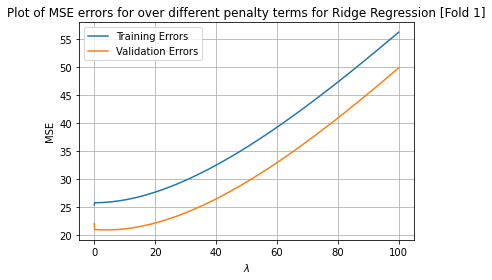

Optimal λ for Fold 1 is 3.9000000000000004


In [17]:
plt.title("Plot of MSE errors for over different penalty terms for Ridge Regression [Fold 1]")
plt.plot(lambda_vec, train_MSE[1], label = "Training Errors")
plt.plot(lambda_vec, val_MSE[1], label = "Validation Errors")
plt.legend()
plt.grid()
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.show()
print("Optimal λ for Fold 1 is " + str(lambda_vec[np.argmin(val_MSE[1])]))

Note that the optimal $\lambda$ for each fold is obtained by taking the index of the minimum of the validation MSE, and using that index to find the corresponding lambda.

This is done for each of the five folds:

In [18]:
# The optimal lambdas for for each fold obtained using argmin
for i in range(0,5):
    print("Optimal λ for Fold " + str(i+1) + " is " + str(lambda_vec[np.argmin(val_MSE[i+1])]))

Optimal λ for Fold 1 is 3.9000000000000004
Optimal λ for Fold 2 is 0.1
Optimal λ for Fold 3 is 13.3
Optimal λ for Fold 4 is 17.0
Optimal λ for Fold 5 is 0.1


#### Question 1.2.2
***

In order to compute the average in-sample and out-of-sample MSEs, we first need to obtain the optimal $\lambda$ out of all the folds.

This is done by computing the average validation MSE over all the folds for each $\lambda$, and then finding the minimum over this:

In [19]:
# Compute the average validation MSE over the folds, to get average for each penalty term
average_val_MSE = np.mean([val_MSE[fold] for fold in range(1, 6)], axis = 0)
optimal_lambda = lambda_vec[np.argmin(average_val_MSE)]
print("The optimal lambda is: " + str(optimal_lambda))

The optimal lambda is: 1.3


We then train the model over the whole of the training data using this optimal lambda parameter.

In [20]:
beta_ridge = ridge_estimate(X_train, Y_train, penalty=optimal_lambda)

The resulting MSEs are obtained below:

In [21]:
# in sample MSE
train_preds_ridge = predict_with_estimate(X_train, beta_ridge)
MSE_train_ridge = np.mean((Y_train - train_preds_ridge) ** 2)

# out of sample MSE
test_preds_ridge = predict_with_estimate(X_test, beta_ridge)
MSE_test_ridge = np.mean((Y_test - test_preds_ridge) ** 2)

print("Ridge - In sample error    : " + str(MSE_train_ridge))
print("Ridge - Out of sample error: " + str(MSE_test_ridge))

Ridge - In sample error    : 24.559828320867624
Ridge - Out of sample error: 19.360934376274972


For comparsion, the MSEs obtained via linear regression are as below:

In [22]:
print("Linear Regression - In sample error    : " + str(MSE_train))
print("Linear Regression - Out of sample error: " + str(MSE_test))

Linear Regression - In sample error    : 24.38006444485437
Linear Regression - Out of sample error: 19.525828624573784


Thus we can see that both the methods produce very similar results, with the ridge regression obtaining slightly out-of-sample MSE (which is the target we are interested in).

The ridge regression model has a penalty term whose effect is to try and keep the coefficients small, and the benefit of this is that there can be lower variance in the model.  

We do indeed observer that the the coefficients (the beta vector for ridge) are smaller:

In [23]:
# Differences observed in parameters
abs_diff_beta = np.abs(beta_ml - beta_ridge)

df_beta_parameters = pd.DataFrame(columns=['Linear Regression Parameters', 
                                           'Ridge Regression Parameters',
                                           'Absolute Difference in Parameters'],
                                  index=[['β_%s' %i for i in range(18)]],
                                  data = np.array([beta_ml, beta_ridge, abs_diff_beta]).T)

pd.set_option('display.float_format', str)

df_beta_parameters.round(3)

,Linear Regression Parameters,Ridge Regression Parameters,Absolute Difference in Parameters
β_0,22.521,22.455,0.065
β_1,-0.624,-0.636,0.012
β_2,5071.913,0.572,5071.34
β_3,-35510.064,-0.1,35509.963
β_4,35509.889,-0.1,35509.988
β_5,1394964953.358,-0.84,1394964954.198
β_6,979.428,1.585,977.842
β_7,-0.164,-0.148,0.017
β_8,1202.083,-1.732,1203.814
β_9,-976.306,1.56,977.866


In particular, ridge regression is advantageous in the cases where many predictors are collinear with eachother, however if this is not the case then ridge may not provide any significant advantage.

We can investigate this collinearity using a correlation matrix:

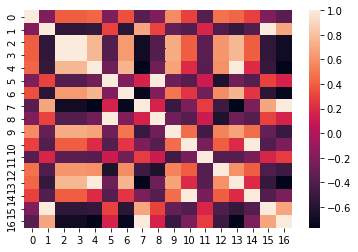

In [24]:
# Correlation Matrix
corr_mat = pd.DataFrame(X_train).corr()
sns.heatmap(np.array(corr_mat)[1:, 1:])
plt.show()

Here, the lighter squares correspond to precitors being very correlated.
We have excluded the column of ones here, and we observe that apart from the diagonal, there only seem to be very few highly correlated predictors. For example on the diagram we can observe predictors 1 and 15 appear to be highly correlated.

However the vast majority are much darker, suggesting that there is not a significant amount of collinearity present in general. And hence ridge regression can only provide a small advantage (as seen by the lower MSE).

### 1.3 Regression with $k$ nearest neighbours ($knn$)
***

#### Question 1.3.1
***

Firstly, we begin by making our knn algorithm.

The k nearest neighbours algorithm works by computing the distances between a given test set and the samples from the training set. It then selects the $k$ nearest neighbours to each point in the test set, and in the case of regression, averages these values in the neighbourhood to form a prediciton.

In [25]:
# distance function for kNN
def euclidian_distance(p, q):
    return np.sqrt(np.sum((q-p)**2, axis = 1))

# function to find the k nearest neighbours in the training set given a test set
def k_neighbours(X_train, X_test, k=5, return_distance=False):
    dist = []
    neigh_ind = []
    
    # compute distance from each point x_text in X_test to all points in X_train 
    point_dist =  [euclidian_distance(x_test, X_train) for x_test in X_test]
    
    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]
    
        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]
    
        dist.append(dist_list)
        neigh_ind.append(ind_list)
    
    # return distances together with indices of k nearest neighbours
    if return_distance:
        return np.array(dist), np.array(neigh_ind)
    
    return np.array(neigh_ind)

In [26]:
# A function to predict the values of the test points.
def reg_predict(X_train, Y_train, X_test, k):
    # each of the k neighbours contributes equally to the classification of any data point in X_test  
    neighbours = k_neighbours(X_train, X_test, k=k)
    # compute mean over neighbours labels 
    Y_pred = np.array([np.mean(Y_train[neighbour]) for neighbour in neighbours])
    return Y_pred

Finally, we need a measure of how well the model predicts the y values.
For this we use the $R^2$ score.

$$
R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} \, ,
$$
where $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$.

In [27]:
# Function that calculates the R2 score given the predictions and actual values
def r2_score(y_test, y_pred):
    numerator = np.sum((y_test - y_pred)**2)
    y_avg = np.mean(y_test)
    denominator = np.sum((y_test - y_avg)**2)
    return 1 - numerator/denominator

Again, in order to scan the optimal parameter term (in this case $k$), we create a vector of different possible values from 1 to 50

In [28]:
k_vec = np.arange(50)+1

In [29]:
def cross_val_evaluate_kNN(folds, k_vec):
    
    # create dictionaries
    train_MSE = {1:[], 2:[], 3:[], 4:[], 5:[]}
    val_MSE = {1:[], 2:[], 3:[], 4:[], 5:[]}

    for i in range(len(folds)):
      
        print('Fold', i+1)
        # define the training set (i.e. selecting all folds and deleting the one used for validation)
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
        X_train = train_folds[:,:-1]
        y_train = train_folds[:, -1]
        
        # define the validation set
        val_fold = folds[i]
        X_val = val_fold[:,:-1]
        y_val = val_fold[:, -1]
    
        # train the model and obtain the parameters for each k
        for k_param in k_vec:                        
            train_preds_kNN = reg_predict(X_train, y_train, X_train, k_param)
            val_preds_kNN = reg_predict(X_train, y_train, X_val, k_param)
            
            # evaluate
            # training data MSE
            MSE_train_kNN = np.mean((y_train - train_preds_kNN) ** 2)
            
            # validation data MSE
            MSE_val_kNN = np.mean((y_val - val_preds_kNN) ** 2)
            
            # store these in the appropriate dictionaries
            train_MSE[i+1].append(MSE_train_kNN)
            val_MSE[i+1].append(MSE_val_kNN)
    
   
    print("Training finished.")
    return train_MSE, val_MSE

As before, we create a function that has one loop through the set of folds and another loop over the vector of $k$s, and applies the kNN model for wach combination

The training and validation MSEs are also computed similarly and stored in dictionaries again:

Perform the cross validation for each parameter value as required:

In [30]:
train_MSE_kNN, val_MSE_kNN = cross_val_evaluate_kNN(folds, k_vec)

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Training finished.


Again, consider Fold 1 from our set of folds.
We see in the function above that for this fold, a new model is created for each $k$, and the two MSEs are computed.
These can then be plotted as below:

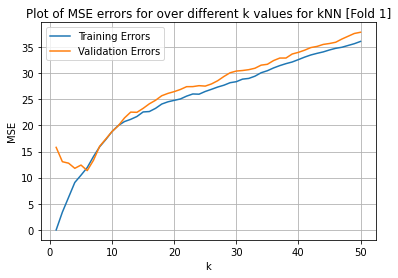

In [31]:
plt.title("Plot of MSE errors for over different k values for kNN [Fold 1]")
plt.plot(k_vec, train_MSE_kNN[1], label = "Training Errors")
plt.plot(k_vec, val_MSE_kNN[1], label = "Validation Errors")
plt.legend()
plt.grid()
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()

From the plot we can see that the training MSE is a strictly increasing function of k, however for the validation error, there appears to be a minimum in the MSE between 0 and 10.

We can obtain the optimal $k$ at which this happens using the "argmin" function as before:

In [32]:
print("Optimal k for Fold 1 is " + str(k_vec[np.argmin(val_MSE_kNN[1])]))

Optimal k for Fold 1 is 6


Similarly, the optimal parameter for each of the five folds are obtained below:

In [33]:
for i in range(0,5):
    print("Optimal k for Fold " + str(i+1) + " is " + str(k_vec[np.argmin(val_MSE_kNN[i+1])]))

Optimal k for Fold 1 is 6
Optimal k for Fold 2 is 2
Optimal k for Fold 3 is 5
Optimal k for Fold 4 is 4
Optimal k for Fold 5 is 2


In terms of the distribution of errors, it makes sense that there will be an optimal $k$ corresponding to a local minimum of the validation MSE. 

For very small $k$, we expect the model to perform very well for the training set (as each prediction has the actual value as one of the few neighbours), however it is also likely overfit to this set, and as a result it will not be generalisable to any new set (such as the validation set)

In contrast, if $k$ is very large, then the model will no longer be very local as many neighbours will be selected for each point. Thus, this will no longer perform well for either the training or the validation set.

And thus we expect there to be a minimum value of k that is small, but not small enough to overfit.

#### Question 1.3.1
***

Next, we find the optimal value of k over all of the folds as follows:

In [40]:
# Compute the average validation MSE over the folds, to get average for each penalty term
average_val_MSE_kNN = np.mean([val_MSE_kNN[fold] for fold in range(1, 6)], axis = 0)
optimal_k = k_vec[np.argmin(average_val_MSE_kNN)]
print("The optimal k overall is: " + str(optimal_k))

The optimal k overall is: 2


We then use this to train the model over the whole training dataset using the optimal $k$, and then obtain the in-sample and out-of-sample MSEs using the training and the test data respectively:

In [42]:
# in sample MSE
train_preds_kNN = reg_predict(X_train, Y_train, X_train, optimal_k)
MSE_train_kNN = np.mean((Y_train - train_preds_kNN) ** 2)

# out of sample MSE
test_preds_kNN = reg_predict(X_train, Y_train, X_test, optimal_k)
MSE_test_kNN = np.mean((Y_test - test_preds_kNN) ** 2)

print("Cross-val kNN - In sample error        : " + str(MSE_train_kNN))
print("Cross-val kNN - Out of sample error    : " + str(MSE_test_kNN))

Cross-val kNN - In sample error        : 3.973725247524753
Cross-val kNN - Out of sample error    : 13.935808823529408


And we can also get a measure of the accuracies using the $R^2$ score:

In [43]:
print('Cross-val kNN Train set mean accuracy  :', r2_score(Y_train, train_preds_kNN))
print('Cross-val kNN Test set mean accuracy   :', r2_score(Y_test, test_preds_kNN))

Cross-val kNN Train set mean accuracy  : 0.9557419532102102
Cross-val kNN Test set mean accuracy   : 0.7619048240726203


The MSE values for each of the 3 models are summarised below:

In [44]:
reg_MSE = np.array([[MSE_train, MSE_test],[MSE_train_ridge, MSE_test_ridge], [MSE_train_kNN, MSE_test_kNN]])
reg_MSE_df = pd.DataFrame(reg_MSE, columns = ["Training", "Validation"], index = ["Linear Regression", "Ridge Regression", "kNN"])
reg_MSE_df

,Training,Validation
Linear Regression,24.38006444485437,19.525828624573784
Ridge Regression,24.559828320867624,19.360934376274972
kNN,3.973725247524753,13.935808823529408


Thus we see that the kNN model appears to have a much higher performance when comparing the Validation MSEs.
This could be explained by the fact that the Linear and Ridge regression models require the assumption of linearity in the data, however as kNN is a local model, it can also deal with any non-linearity which may be present.

Furthermore, as we have no other information about the data, we are unsure if the data is homogeneous or not (that is drawn from a single or similar populations).

The fact that the regression models performed slighlty worse may suggest that there is some inhomogeneity iand so one regression model for all the data might not be suitable. One possible way we could deal with an inhomogeneous data set, is by fitting different models over different regions, for example various kNN models for particular regions, each with an optimal $k$ for that area.

## Task 2: Classification
***

### 2.1 Logistic Regression
***

#### Question 2.1.1
***